# Functional Analysis / Numerical Analysis

## 0. Initialize

In [1]:
#mathematics
using LinearAlgebra
using Polynomials

#statistics
using Random
using Statistics

#visualize
using Plots
pyplot()

#macros
using UnPack
using ProgressMeter

## 1. Least Square Method

### 1-1. Linear Regression

In [2]:
#true function
function true_func(x)
    0.7*(sin(3*x) + cos(2*x) + sin(5*x))
end

#basis function
function design_matrix(X,μs,σs,N,D)
    [exp(-0.5*(X[n]-μs[j])^2/σs[j]^2) for n in 1:N, j in 1:D]
end

#solve regular equations
function solve_regular_equations(data,params)
    @unpack X,Y,N = data
    @unpack μs,σs = params
    Φ = design_matrix(X,μs,σs,N,D)
    (Φ'*Φ)\(Φ'*Y)
end

#regression function
function reg_func(x,wvec,params)
    @unpack μs,σs = params
    dot(wvec,[exp(-0.5*(x-μs[j])^2/σs[j]^2) for j in 1:D])
end

reg_func (generic function with 1 method)

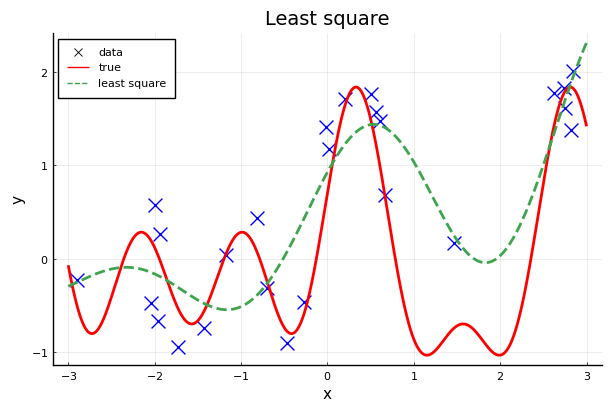

In [3]:
#create data
Random.seed!(42)
N = 25
X = 6*(rand(N).-0.5)
Y = true_func.(X)+ 0.5*randn(N)
data = (X=X,Y=Y,N=N)

#set the parameters
D = 7
params = (μs=-3:3,σs=ones(D),D=D)

#compute approximation function 
coeff = solve_regular_equations(data,params)

#visualize the resutls
xs = -3:0.01:3
fig1 = plot(X,Y,st=:scatter,xlabel="x",ylabel="y",label="data",title="Least square",legend=:topleft,
    markershape=:x, markerstrokewidth=1, markersize=10, markercolor=:blue)
plot!(xs,true_func.(xs),label="true",color=:red,lw=2)
plot!(xs,x->reg_func(x,coeff,params),label="least square",ls=:dash,lw=2)
savefig(fig1,"figs-FA/fig1.png")

### 1-2. Polynomial Approximation

In [4]:
#true function
function true_func(x)
    log(x)
end

#compute Hilbert matrix
function Hilbert_matrix(max_dim)
    [1/(i+j+1) for i in 0:max_dim, j in 0:max_dim]
end

#project true function to the basis
function project_f(max_dim)
    -[1/(j+1)^2 for j in 0:max_dim]
end

#compute coefficient
function solve_regular_equations(max_dim)
    GH = Hilbert_matrix(max_dim)
    b = project_f(max_dim)
    GH\b
end

#approximate polynomial
function poly_func(x,coeffs,max_dim)
    dot([x^k for k in 0:max_dim],coeffs)
end

poly_func (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


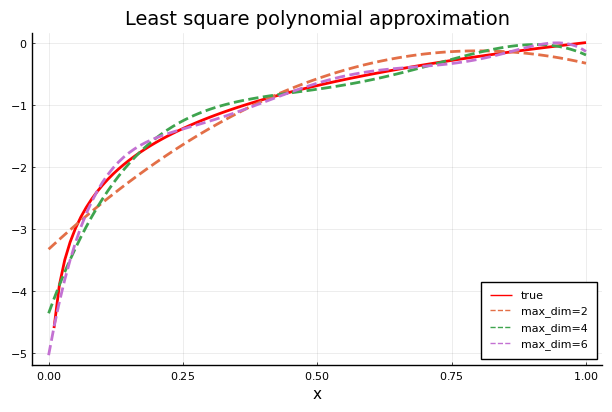

In [5]:
#plot the ture and approximated function
xs = 0:0.01:1
fig2 = plot(xlabel="x",title="Least square polynomial approximation",legend=:bottomright)
plot!(xs,true_func.(xs),label="true",color=:red,lw=2)
@showprogress for max_dim in 2:2:6
    coeff = solve_regular_equations(max_dim)
    plot!(xs,x->poly_func(x,coeff,max_dim),label="max_dim=$(max_dim)",ls=:dash,lw=2)
end
savefig(fig2,"figs-FA/fig2.png")

## 2. Orthotgonal Polynomial Approximation

### 2-1. Legendre Polynomial

In [6]:
#true function 
function true_func(x)
    cos(x)
end

#Legendre polynomial expansion(0 order)
function Legendre0(x)
    sin(1)
end

#Legendre polynomial expansion(2 order)
function Legendre2(x)
    sin(1) + 5*(3*cos(1)-2*sin(1))*(3*x^2-1)/2
end

Legendre2 (generic function with 1 method)

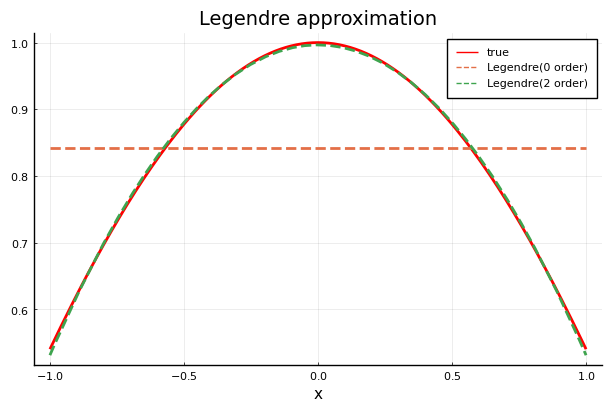

In [7]:
xs = -1:0.01:1
fig3 = plot(xs,x->true_func(x),title="Legendre approximation",xlabel="x",label="true",color=:red,lw=2)
plot!(Legendre0,label="Legendre(0 order)",ls=:dash,lw=2)
plot!(Legendre2,label="Legendre(2 order)",ls=:dash,lw=2)
savefig(fig3,"figs-FA/fig3.png")

### 2-2. Chebyshev Polynomial and Min-Max Approximation

In [8]:
#true function 
function true_func(x)
    sqrt(1-x^2)*x
end

#Chebyshev approximation(1 order)
function Chebyshev1(x)
    2/π*(
        2/3*x
    )
end

#Chebyshev approximation(3 order)
function Chebyshev3(x)
    2/π*(
        2/3*x + 
        (-2/5)*(4*x^3-3*x)
    )
end

#Chebyshev approximation(5 order)
function Chebyshev5(x)
    2/π*(
        2/3*x + 
        (-2/5)*(4*x^3-3*x) +
        (-2/21)*(16*x^5-20*x^3+5*x)
    )
end

Chebyshev5 (generic function with 1 method)

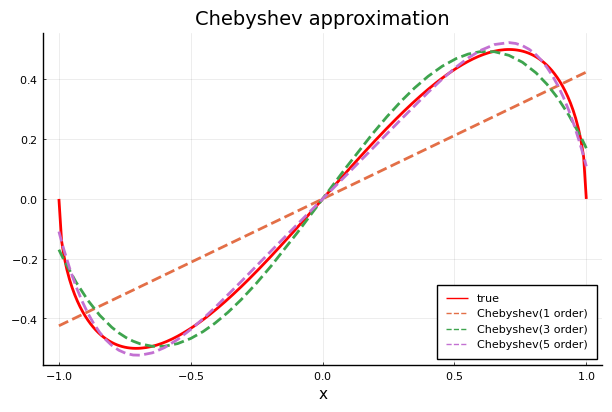

In [9]:
xs = -1:0.01:1
fig4 = plot(xs,x->true_func(x),title="Chebyshev approximation",
    xlabel="x",label="true",color=:red,lw=2,legend=:bottomright)
plot!(Chebyshev1,label="Chebyshev(1 order)",ls=:dash,lw=2)
plot!(Chebyshev3,label="Chebyshev(3 order)",ls=:dash,lw=2)
plot!(Chebyshev5,label="Chebyshev(5 order)",ls=:dash,lw=2)
savefig(fig4,"figs-FA/fig4.png")